## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

pd.set_option('display.max_columns', None)

## 1. Introduction:

A census is the procedure of systematically acquiring and recording information about the members of a given population. The census is a special, wide-range activity, which takes place once a decade in the entire country. The purpose is to gather information about the general population, in order to present a full and reliable picture of the population in the country - its housing conditions and demographic, social and economic characteristics. The information collected includes data on age, gender, country of origin, marital status, housing conditions, marriage, education, employment, etc.

__1.1 Data description__

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). The prediction task is to determine whether a person makes over $50K a year.

__1.2 Features Description__

__1.2.1 Categorical Attributes__

*workclass:* Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. (Individual work category)

*education:* Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. (Individual's highest education degree)

*marital-status:* Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. (Individual marital status)

*occupation:* Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. (Individual's occupation)

*relationship:* Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. (Individual's relation in a family)

*race:* White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. (Race of Individual)

*sex:* Female, Male.

*native-country:* United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands. (Individual's native country)

__1.2.2 Continuous Attributes__

*age:* continuous. (Age of an individual)

*education-num*: number of education year, continuous. (Individual's year of receiving education)

*fnlwgt:* final weight, continuous. (The weights on the CPS files are controlled to independent estimates of the civilian noninstitutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau.)

*capital-gain:* continuous.

*capital-loss:* continuous.

*hours-per-week:* continuous. (Individual's working hour per week)

## Reading the data

In [2]:
# dataset url = https://drive.google.com/file/d/1GtwjrZpP6jiZWXyYShiMHBamUstFgaEF/view?usp=sharing

data_df = pd.read_csv('adult.csv')

In [3]:
data_df.head() # first 5 rows

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
data_df.columns = data_df.columns.str.title() # converting the columns in title format

In [5]:
print('The dataset has {} rows and {} columns'.format(data_df.shape[0], data_df.shape[1]))

The dataset has 48842 rows and 15 columns


In [6]:
data_df.info() # checking the data types of the features in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              48842 non-null  int64 
 1   Workclass        48842 non-null  object
 2   Fnlwgt           48842 non-null  int64 
 3   Education        48842 non-null  object
 4   Educational-Num  48842 non-null  int64 
 5   Marital-Status   48842 non-null  object
 6   Occupation       48842 non-null  object
 7   Relationship     48842 non-null  object
 8   Race             48842 non-null  object
 9   Gender           48842 non-null  object
 10  Capital-Gain     48842 non-null  int64 
 11  Capital-Loss     48842 non-null  int64 
 12  Hours-Per-Week   48842 non-null  int64 
 13  Native-Country   48842 non-null  object
 14  Income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [7]:
# descriptive statistics of the dataset

data_df.describe()

,Age,Fnlwgt,Educational-Num,Capital-Gain,Capital-Loss,Hours-Per-Week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


## Data Cleaning and Preparation

The first step to analyse any dataset is to clean and prepare the data. Some of the steps involved are

* Handling missing values.
* Format existing data to make it meaningful for plotting.
* Try to create new columns using existing columns.

In [8]:
data_df.isna().sum() # Checking for nan values in the data

Age                0
Workclass          0
Fnlwgt             0
Education          0
Educational-Num    0
Marital-Status     0
Occupation         0
Relationship       0
Race               0
Gender             0
Capital-Gain       0
Capital-Loss       0
Hours-Per-Week     0
Native-Country     0
Income             0
dtype: int64

Here we can see that there are no nan values present.

But if we look closely, the nan values are represented in the form of `'?'`. So we must check for `'?'` in the dataset.

In [9]:
data_df.isin(['?']).sum()

Age                   0
Workclass          2799
Fnlwgt                0
Education             0
Educational-Num       0
Marital-Status        0
Occupation         2809
Relationship          0
Race                  0
Gender                0
Capital-Gain          0
Capital-Loss          0
Hours-Per-Week        0
Native-Country      857
Income                0
dtype: int64

### Work class:

In [10]:
data_df['Workclass'].unique() # checking the unique values in the feature

array(['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

We can replace the nan values present in the work class feature using a new categorial varialbe 'Unknown'

In [11]:
# replacing ? with Unknown

data_df['Workclass'].replace('?', 'Unknown', inplace = True) 

In [12]:
data_df['Workclass'].unique() # checking the unique values in the feature

array(['Private', 'Local-gov', 'Unknown', 'Self-emp-not-inc',
       'Federal-gov', 'State-gov', 'Self-emp-inc', 'Without-pay',
       'Never-worked'], dtype=object)

### Occupation

In [13]:
data_df['Occupation'].unique() # checking the unique values in the feature

array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv', '?',
       'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical',
       'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv',
       'Transport-moving', 'Handlers-cleaners', 'Armed-Forces'],
      dtype=object)

We can replace the nan values present in the Occupation feature using a new categorial varialbe 'Unknown'

In [14]:
# replacing ? with Unknown

data_df['Occupation'].replace('?', 'Unknown', inplace = True) 

In [15]:
data_df['Occupation'].unique() # checking the unique values in the feature

array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv',
       'Unknown', 'Other-service', 'Prof-specialty', 'Craft-repair',
       'Adm-clerical', 'Exec-managerial', 'Tech-support', 'Sales',
       'Priv-house-serv', 'Transport-moving', 'Handlers-cleaners',
       'Armed-Forces'], dtype=object)

### Native-Country

In [16]:
data_df['Native-Country'].unique() # checking the unique values in the feature

array(['United-States', '?', 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
       'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France',
       'Holand-Netherlands'], dtype=object)

We can replace the nan values present in the Native-Country feature using a new categorial varialbe 'Unknown'

In [17]:
# replacing ? with Unknown

data_df['Native-Country'].replace('?', 'Unknown', inplace = True) 

In [18]:
data_df['Native-Country'].unique() # checking the unique values in the feature

array(['United-States', 'Unknown', 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
       'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France',
       'Holand-Netherlands'], dtype=object)

###  Education

In [19]:
data_df['Education'].unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', 'Doctorate',
       '5th-6th', 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool'],
      dtype=object)

We can combine all the relevant education groups to a single group using the replace method.

In [20]:
# replacing the classes relevant as Dropout

data_df['Education'].replace(['11th', '10th', '7th-8th','5th-6th',
                              '9th', '12th', '1st-4th', 'Preschool'], 'Dropout', inplace = True)

# replacing HS-grad to HighSchool Graduate

data_df['Education'].replace(['HS-grad'], 'HighSchool Graduate', inplace = True)

# 'Assoc-acdm', 'Some-college', 'Assoc-voc' to 'Community College'

data_df['Education'].replace(['Assoc-acdm', 'Some-college', 'Assoc-voc'], 
                             'Community College', inplace = True)

# replacing 'Prof-school' to 'Masters'

data_df['Education'].replace('Prof-school', 'Masters', inplace = True)

In [21]:
data_df['Education'].value_counts() # frequency of all the unique values

HighSchool Graduate    15784
Community College      14540
Bachelors               8025
Dropout                 6408
Masters                 3491
Doctorate                594
Name: Education, dtype: int64

### Marrital Status 

In [22]:
data_df['Marital-Status'].unique() # unique values in the marital-status column

array(['Never-married', 'Married-civ-spouse', 'Widowed', 'Divorced',
       'Separated', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [23]:
# replacing 'Never-married' to 'Not Married'

data_df['Marital-Status'].replace('Never-married', 'Not Married', inplace = True)

# replacing 'Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse' to 'Married'
data_df['Marital-Status'].replace(['Married-civ-spouse', 'Married-spouse-absent', 
                                  'Married-AF-spouse'], 'Married', inplace = True)

# replacing 'Separated' to 'Divorced'

data_df['Marital-Status'].replace('Separated', 'Divorced', inplace = True)

In [24]:
data_df['Marital-Status'].value_counts() # frequency of the unique values

Married        23044
Not Married    16117
Divorced        8163
Widowed         1518
Name: Marital-Status, dtype: int64

In [25]:
data_df.head()

,Age,Workclass,Fnlwgt,Education,Educational-Num,Marital-Status,Occupation,Relationship,Race,Gender,Capital-Gain,Capital-Loss,Hours-Per-Week,Native-Country,Income
0,25,Private,226802,Dropout,7,Not Married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HighSchool Graduate,9,Married,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Community College,12,Married,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Community College,10,Married,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Unknown,103497,Community College,10,Not Married,Unknown,Own-child,White,Female,0,0,30,United-States,<=50K


## Univariate & Bivariate Analysis

In [26]:
sns.set_theme(style = 'darkgrid', context = 'poster', color_codes = True,
             font_scale = 0.75) # setting the style of the plots globally

### Age

We can check the distribution of the age column with respect to the two values present in the Income column (target).

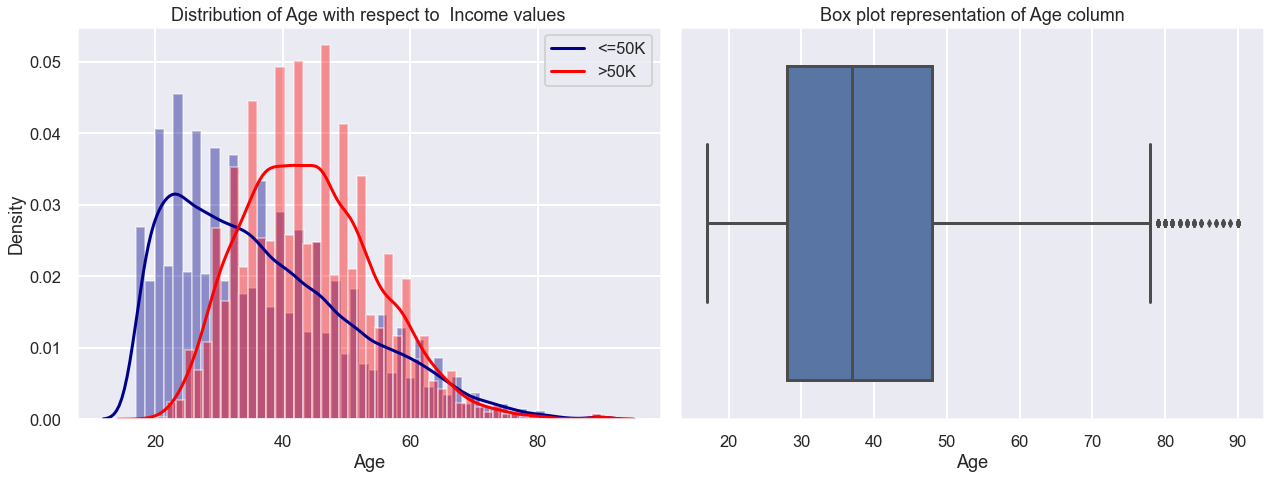

In [27]:
plt.figure(figsize = (18, 7))

ax1 = plt.subplot(121) # subplot on row - 1 coloum - 1

# distplot for income values <= 50K
sns.distplot(data_df[data_df['Income'] == '<=50K']['Age'], color = 'darkblue')
# distplot for income values > 50K
sns.distplot(data_df[data_df['Income'] == '>50K']['Age'], color = 'red')

plt.legend(['<=50K', '>50K'])

plt.title('Distribution of Age with respect to  Income values') # title of the plot

plt.tight_layout()

ax2 = plt.subplot(122) # subplot on row - 1 coloum - 2

sns.boxplot(data_df['Age']) # boxplot of the Age column

plt.title('Box plot representation of Age column')  # title of the plot

plt.tight_layout()

__Observations__:

__Plot 1:__
* Here we can see that more number of adults between the age of 20 to 30 earn less than 50K. This might be because of their less experience.

* Adults between the age of 35 to 55 earn more than 50K. This might be because of their high experience.

__Plot 2:__

* Here we can see that there some outliers in the Age column that must be removed so it doesn't affect our analysis.

In [28]:
def Zscore_outlier(df):
    outliers = []
    m = np.mean(df)
    sd = np.std(df)
    for i in df: 
        z = (i-m)/sd
        if np.abs(z) > 3: 
            outliers.append(i)
    return outliers

age_outliers = Zscore_outlier(data_df['Age'])
print(*age_outliers)

80 90 80 81 82 83 81 85 80 90 81 84 81 89 81 83 81 82 80 90 81 83 80 90 90 84 80 80 80 81 90 85 90 81 81 80 80 81 80 88 87 90 83 80 90 81 81 90 82 90 87 81 88 80 81 80 81 90 88 89 84 80 80 83 81 90 80 81 90 88 90 90 80 90 81 82 81 80 83 90 90 81 90 90 80 90 90 84 90 80 90 81 83 84 81 85 82 80 90 90 90 84 80 90 90 84 90 90 90 90 82 81 90 84 81 82 81 80 90 80 84 82 90 84 90 83 81 80 80 80 90 90 80 90 90 81 83 82 90 90 81 80 80 90 80 82 85 80 90 81 80 81 82 88 90 82 88 84 83 86 90 90 82 83 81 90 80 81 84 84 90 80 81 81 81 90 87 90 80 80 82 90 90 85 82 81


### Fnlwgt: 

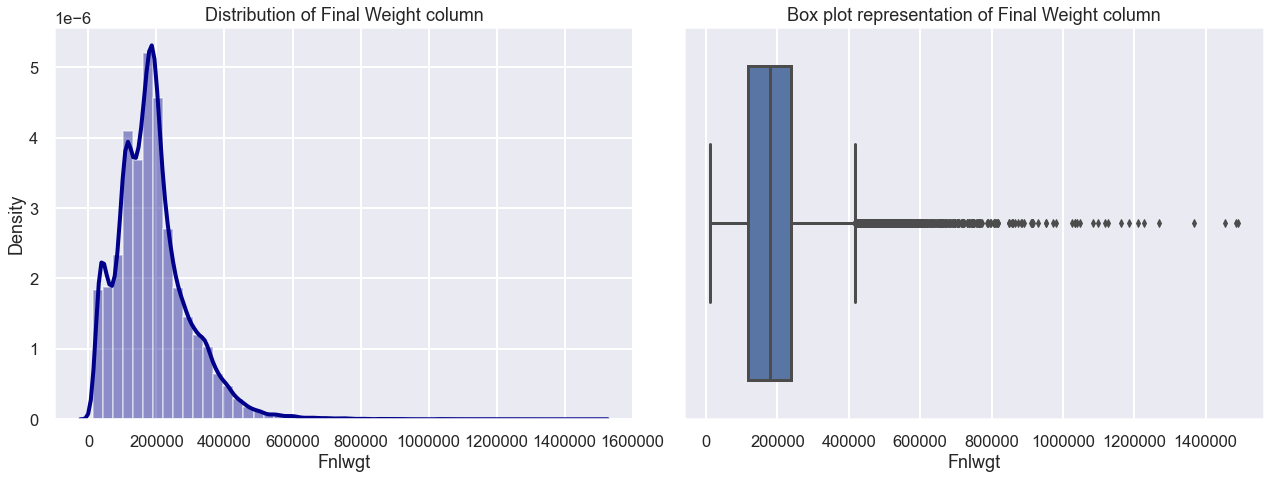

In [29]:
plt.figure(figsize = (18, 7))

ax1 = plt.subplot(121) # subplot on row - 1 coloum - 1

# distplot of Final Weight
sns.distplot(data_df['Fnlwgt'], color = 'darkblue',
             kde_kws = {'linewidth' : 4})
plt.ticklabel_format(style = 'plain', axis ='x') # printiing the x-label normally 
plt.title('Distribution of Final Weight column') # title of the plot
plt.tight_layout()

ax2 = plt.subplot(122) # subplot on row - 1 coloum - 2

sns.boxplot(data_df['Fnlwgt']) # boxplot of Final Weight
plt.ticklabel_format(style = 'plain', axis ='x') # printiing the x-label normally 
plt.title('Box plot representation of Final Weight column') # title of the plot
plt.tight_layout()

__Observations__:

__Plot 1:__

* Here we can see that there more number of adults concerntrated around category of 200000.
* From 200000 the number of people in each category are decreasing.

__Plot 2:__

* There are more number of outliers which can be observed from the plot.

In [30]:
fnlweight_outliers = Zscore_outlier(data_df['Fnlwgt'])
print(len(fnlweight_outliers))

506


### Educational-Num

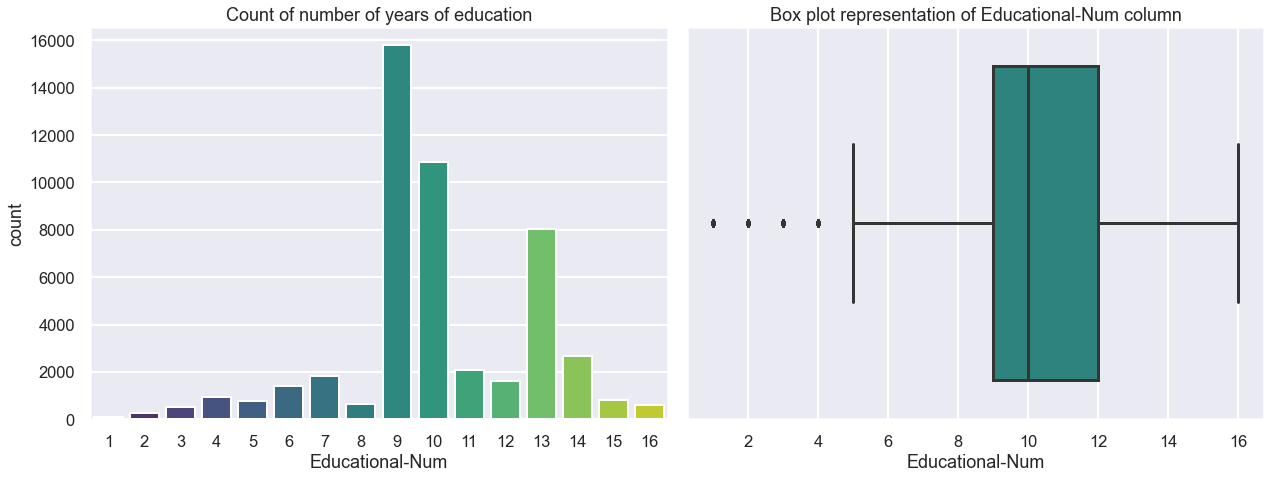

In [31]:
plt.figure(figsize = (18, 7))

ax1 = plt.subplot(121) # subplot on row - 1 coloum - 1

# countplot of the number of years of education
sns.countplot(data_df['Educational-Num'], palette = 'viridis')
plt.title('Count of number of years of education') # title of the plot
plt.tight_layout()

ax2 = plt.subplot(122) # subplot on row - 1 coloum - 2

sns.boxplot(data_df['Educational-Num'],  palette = 'viridis') # boxplot of the Age column
plt.title('Box plot representation of Educational-Num column')  # title of the plot
plt.tight_layout()

__Observations__:

__Plot 1:__

* Here we can see that majority of the adults an education period of 9+ years. 

__Plot 2:__

* Here we can see that there are outliers present in the lower quantile of the plot. It must be treated before our analysis. 


### Hours-Per-Week 

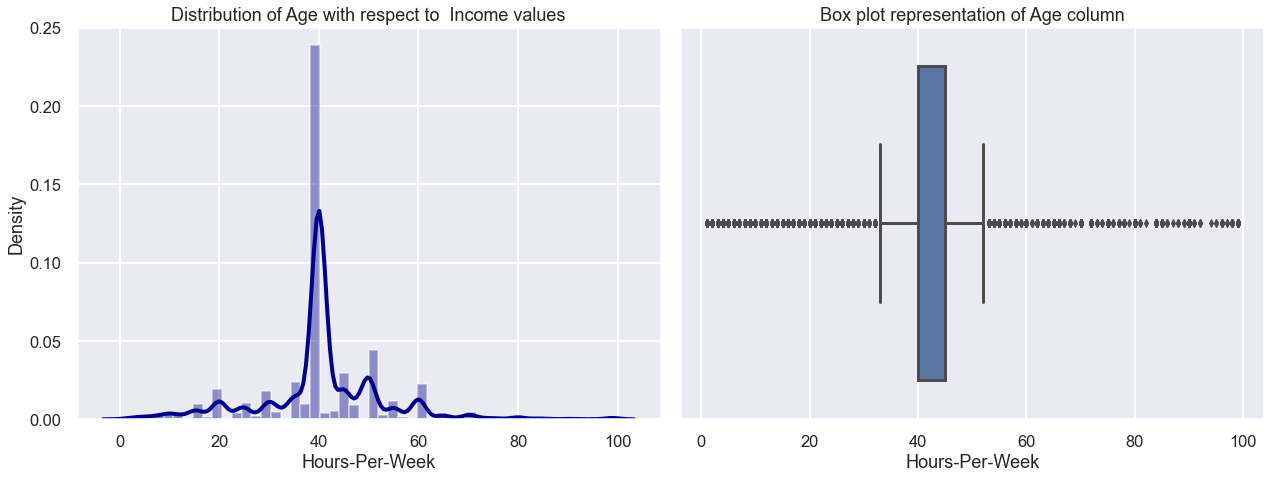

In [32]:
plt.figure(figsize = (18, 7))

ax1 = plt.subplot(121) # subplot on row - 1 coloum - 1

# distplot for income values <= 50K
sns.distplot(data_df['Hours-Per-Week'], color = 'darkblue',
             kde_kws = {'linewidth' : 4})
plt.title('Distribution of Age with respect to  Income values') # title of the plot
plt.tight_layout()

ax2 = plt.subplot(122) # subplot on row - 1 coloum - 2

sns.boxplot(data_df['Hours-Per-Week']) # boxplot of the Age column
plt.title('Box plot representation of Age column')  # title of the plot
plt.tight_layout()

__Observations__:

__Plot 1:__

* Here we can see that majority of the adults work for 40 to 50 hours a week. 

__Plot 2:__

* Here we can see that there are outliers present in the lower quantile and upper quantile of the plot. It must be treated before our analysis. 

### Workclass and Education

In [33]:
data_df.head(3)

,Age,Workclass,Fnlwgt,Education,Educational-Num,Marital-Status,Occupation,Relationship,Race,Gender,Capital-Gain,Capital-Loss,Hours-Per-Week,Native-Country,Income
0,25,Private,226802,Dropout,7,Not Married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HighSchool Graduate,9,Married,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Community College,12,Married,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K


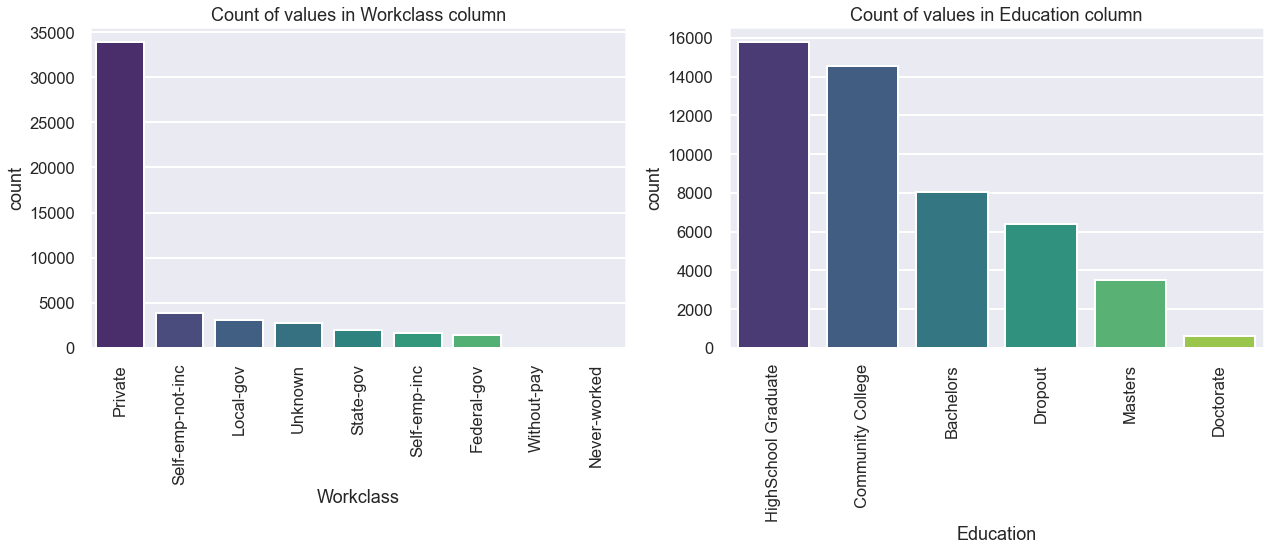

In [34]:
plt.figure(figsize = (18, 8))

ax1 = plt.subplot(121) # subplot on row - 1 coloum - 1

# countplot of Workclass column
sns.countplot(data_df['Workclass'],  order = data_df['Workclass'].value_counts().index,
              palette = 'viridis')
_ = plt.xticks(rotation = 90,
              horizontalalignment = 'center', fontweight = 'light') # formatting the x-axis
plt.title('Count of values in Workclass column') # title of the plot
plt.tight_layout()

ax2 = plt.subplot(122) # subplot on row - 1 coloum - 2

# countplot of the number of years of education
sns.countplot(data_df['Education'], order = data_df['Education'].value_counts().index,
                                 palette = 'viridis') 
_ = plt.xticks(rotation = 90,
              horizontalalignment = 'center', fontweight = 'light') # formatting the x-axis
plt.title('Count of values in Education column')  # title of the plot
plt.tight_layout()

__Observations__:

__Plot 1:__

* Here we can see that most of the adults in the dataset are private employees.

__Plot 2:__

* Here we can see that most of the adults have a degree to their name and there are very few number of dropouts.

### Marital-Status and Occupation

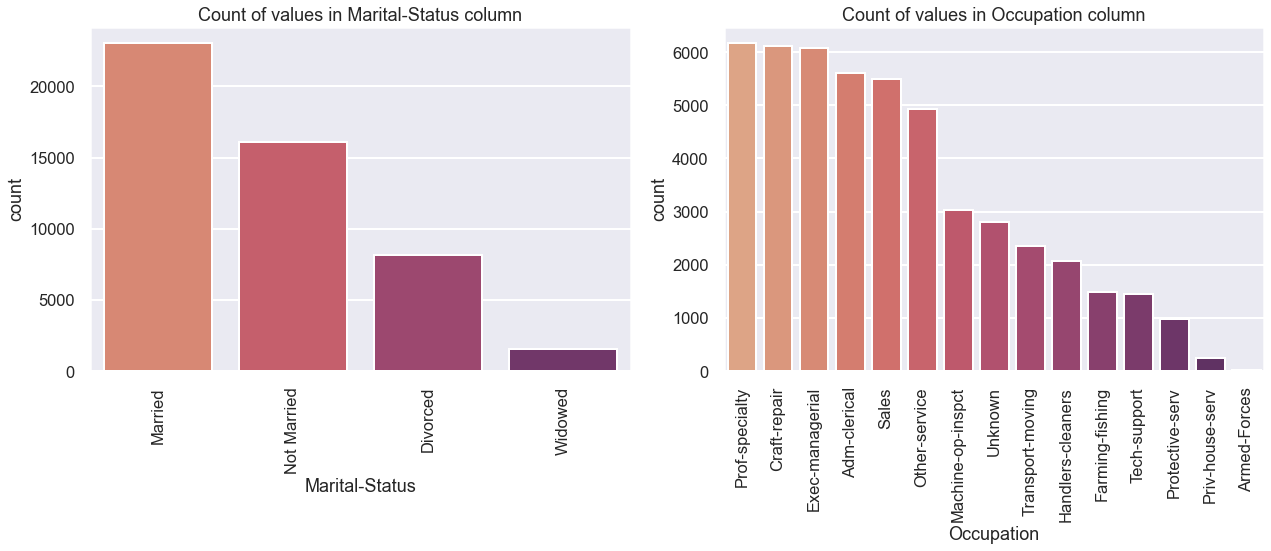

In [35]:
plt.figure(figsize = (18, 8))

ax1 = plt.subplot(121) # subplot on row - 1 coloum - 1

# countplot of Workclass column
sns.countplot(data_df['Marital-Status'],  order = data_df['Marital-Status'].value_counts().index,
              palette = 'flare')
_ = plt.xticks(rotation = 90,
              horizontalalignment = 'center', fontweight = 'light') # formatting the x-axis
plt.title('Count of values in Marital-Status column') # title of the plot
plt.tight_layout()

ax2 = plt.subplot(122) # subplot on row - 1 coloum - 2

# countplot of the number of years of education
sns.countplot(data_df['Occupation'], order = data_df['Occupation'].value_counts().index,
                                 palette = 'flare') 
_ = plt.xticks(rotation = 90,
              horizontalalignment = 'center', fontweight = 'light') # formatting the x-axis
plt.title('Count of values in Occupation column')  # title of the plot
plt.tight_layout()

__Observations__:

__Plot 1:__

* Here we can see that most of the adults in the dataset are married.

__Plot 2:__

* Prof-specialty, Craft-repair, Exec-managerial etc are some of the jobs with higher number of employees.

###  Race, Gender and Relationship

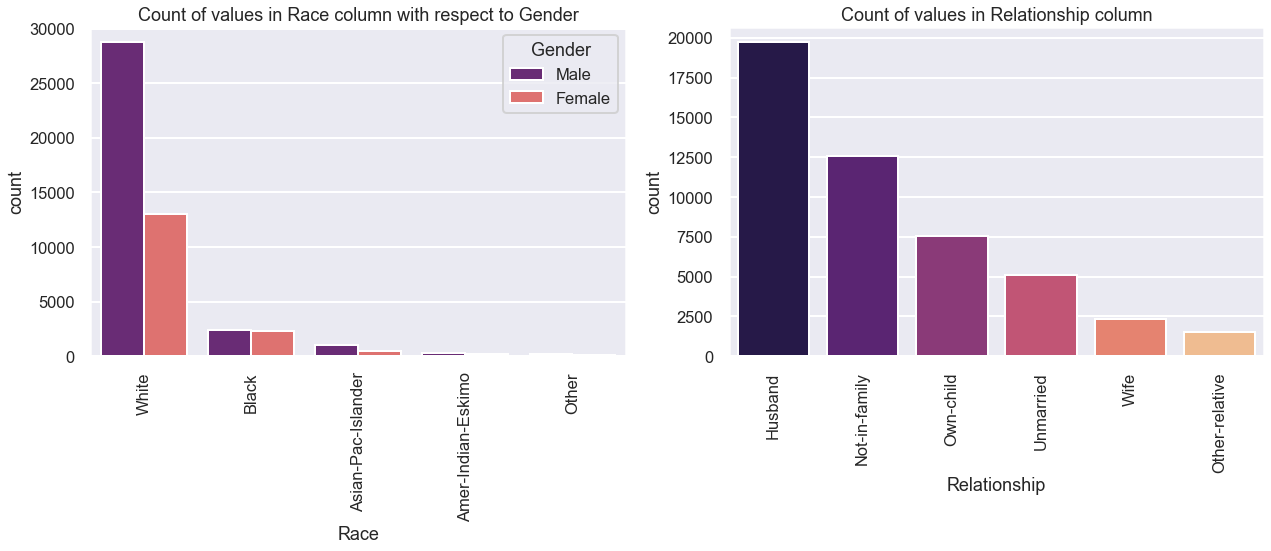

In [36]:
plt.figure(figsize = (18, 8))

ax1 = plt.subplot(121) # subplot on row - 1 coloum - 1

# countplot of Workclass column
sns.countplot(data_df['Race'],  order = data_df['Race'].value_counts().index,
              palette = 'magma', hue = data_df['Gender'])
_ = plt.xticks(rotation = 90,
              horizontalalignment = 'center', fontweight = 'light') # formatting the x-axis
plt.title('Count of values in Race column with respect to Gender') # title of the plot
plt.tight_layout()

ax2 = plt.subplot(122) # subplot on row - 1 coloum - 2

# countplot of the number of years of education
sns.countplot(data_df['Relationship'], order = data_df['Relationship'].value_counts().index,
                                 palette = 'magma') 
_ = plt.xticks(rotation = 90,
              horizontalalignment = 'center', fontweight = 'light') # formatting the x-axis
plt.title('Count of values in Relationship column')  # title of the plot
plt.tight_layout()

__Observations__:

__Plot 1:__

* Here we can see that when it comes to race and gender there are majority of white male and females than any other race.

__Plot 2:__

* Here we can see that majority of the working adults are husbands.

### Income

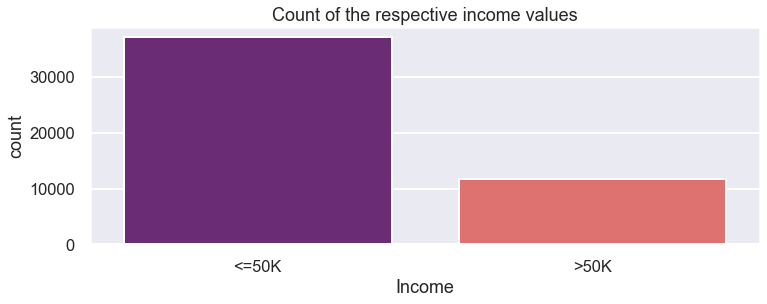

In [37]:
plt.figure(figsize = (12, 4))

# countplot of the number of years of education
sns.countplot(data_df['Income'], palette = 'magma')
plt.title('Count of the respective income values')
plt.show();

### Correlation Plot

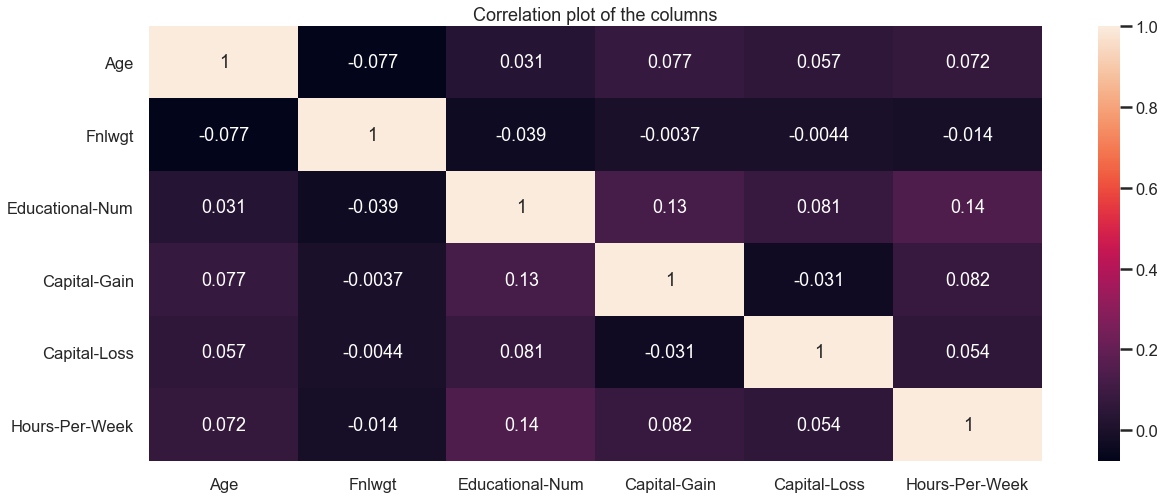

In [38]:
plt.figure(figsize = (20, 8))

sns.heatmap(data_df.corr(), annot = True)
plt.title('Correlation plot of the columns')
plt.show()

__Observation__:

* Here we can see that there are no noticeable amount of correlation between any of the features in the dataset.

###  Age and Income

In [39]:
age_bin = pd.cut(data_df['Age'], 20) # seperating age into 20 bins
age_bin

0          (24.3, 27.95]
1          (35.25, 38.9]
2          (27.95, 31.6]
3          (42.55, 46.2]
4        (16.927, 20.65]
              ...       
48837      (24.3, 27.95]
48838      (38.9, 42.55]
48839      (57.15, 60.8]
48840      (20.65, 24.3]
48841      (49.85, 53.5]
Name: Age, Length: 48842, dtype: category
Categories (20, interval[float64]): [(16.927, 20.65] < (20.65, 24.3] < (24.3, 27.95] < (27.95, 31.6] ... (75.4, 79.05] < (79.05, 82.7] < (82.7, 86.35] < (86.35, 90.0]]

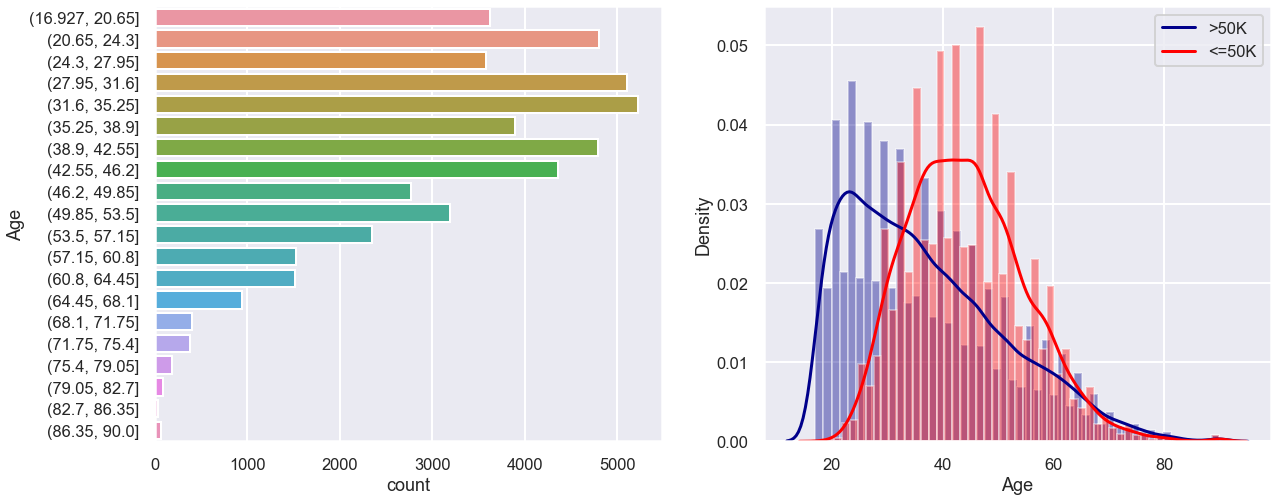

In [40]:
fig = plt.figure(figsize=(20,8)) # setting the figure size

plt.subplot(1, 2, 1) # plot on row-1, column-1
sns.countplot(y=age_bin) # countplot on the binned age

plt.subplot(1, 2, 2) # plot on row-1, column-2
# distplot for income values <= 50K
sns.distplot(data_df[data_df['Income'] == '<=50K']['Age'], color = 'darkblue')
# distplot for income values > 50K
sns.distplot(data_df[data_df['Income'] == '>50K']['Age'], color = 'red')
plt.legend(['>50K', '<=50K'])

In [41]:
data_df.groupby('Income')['Age'].agg(np.median).reset_index()

,Income,Age
0,<=50K,34
1,>50K,43


__Observations:__

* Here we can see that there are more number of workers between the age of 27 and 35.
* Workers below the age of 40 earn less compared to workers above the age of 40.

### Pairplot 

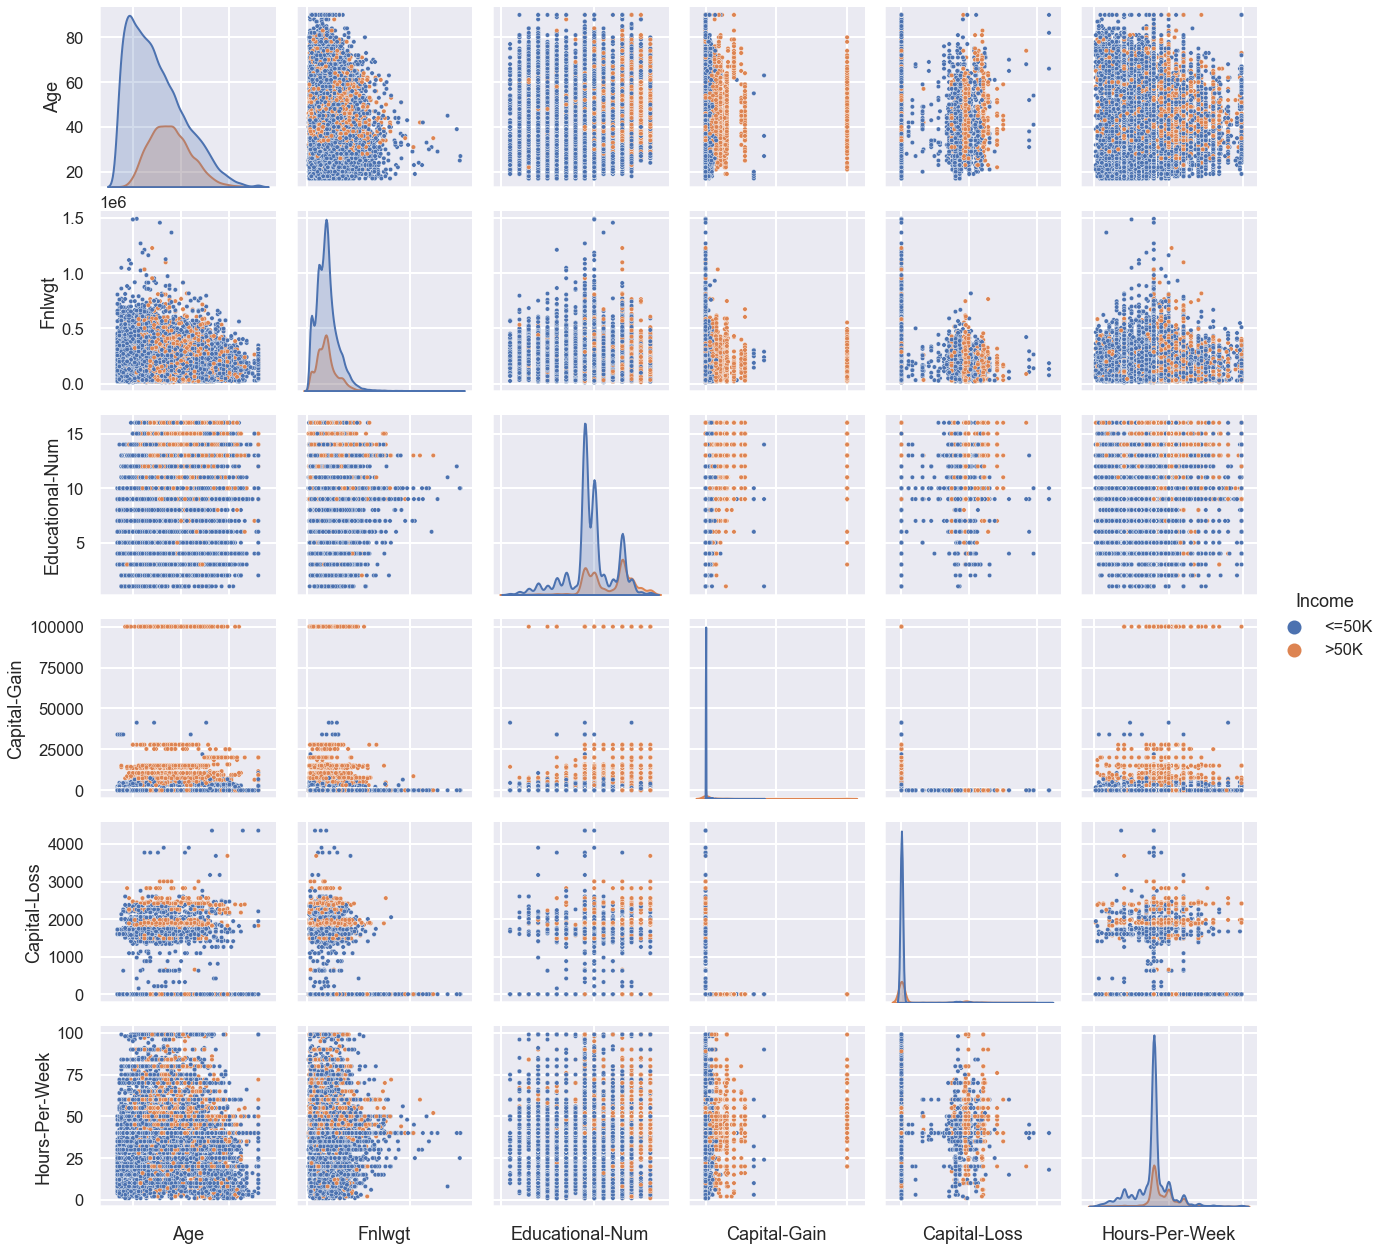

In [42]:
# pairplot
pp = sns.pairplot(data_df, hue = 'Income', palette = 'deep', 
                  size=3, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=20) )
pp.set(xticklabels=[])

### Occupation Vs Age Vs Income

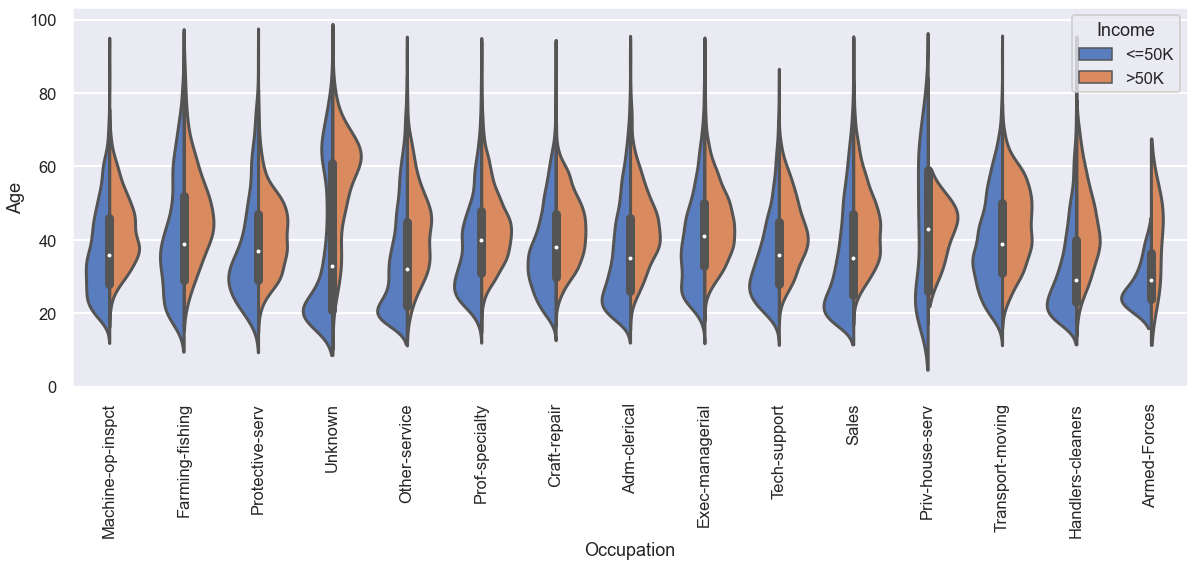

In [43]:
plt.figure(figsize = (20, 7))

# violin plot
sns.violinplot(x= 'Occupation', y= 'Age', hue = 'Income', data = data_df, 
               gridsize = 100, palette = 'muted', split = True, saturation = 0.75)

# formatting x axisIncome
_ = plt.xticks(rotation = 90,
               horizontalalignment = 'center',
               fontweight = 'light')

plt.show()

__Observation:__

* Here we can see that in most of the jobs the there is a peak around the age of 35 to 45, where the salary is greater than 50K. 

* Armed-forces doesn't have a high job salaries.

* There is a very high variation in private house service jobs and also here age is not a factor for the salary.

### Age Vs Gender Vs Income

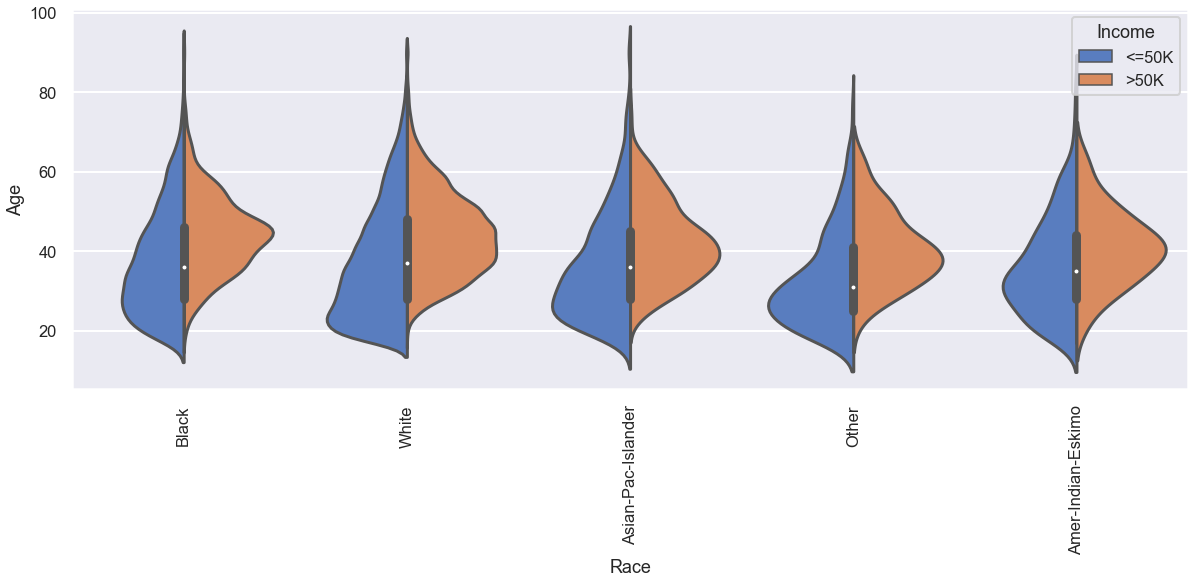

In [44]:
plt.figure(figsize = (20, 7))

# violin plot
sns.violinplot(x = 'Race', y = 'Age', hue = 'Income',
          data = data_df, gridsize = 100, palette = 'muted', split = True, saturation = 0.75)

# formatting x axisIncome
_ = plt.xticks(rotation = 90,
               horizontalalignment = 'center',
               fontweight = 'light')

plt.show()

## Handling Outliers

We can the outliers present in the columns using the z-score method. And finally replace them with the suitable value.

In [45]:
# defining the function to compute the z-score

def zscore_outlier(df):
    outliers = []
    mean = np.mean(df)
    std = np.std(df)
    for obs in df: 
        z_score = (obs-mean)/std
        if np.abs(z_score) > 3: 
            outliers.append(obs)
    return outliers

### Age

In [46]:
age_outliers = zscore_outlier(data_df['Age']) # getting the outliers of the age column

In [47]:
age_percent_99 = int(data_df['Age'].quantile(.99)) # 99th percentile value of age column
age_percent_99

74

In [48]:
# replacing the outliers with the 99th percentile value
    
data_df['Age'].replace(age_outliers, age_percent_99, inplace = True)

### Educational-Num

In [49]:
# getting the outliers of the Educational-Num column

educational_num_outliers = zscore_outlier(data_df['Educational-Num'])
educational_num_outliers

[2,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 1,


In [50]:
# since the outliers are on the lower side
# we can replace them with the 5th percentile value

new_value = data_df['Educational-Num'].quantile(.05)

In [51]:
data_df['Educational-Num'].replace(educational_num_outliers, new_value, inplace = True)

### Hours Per Week

In [52]:
hours_per_week_outliers = zscore_outlier(data_df['Hours-Per-Week'])

In [53]:
pd.Series(hours_per_week_outliers).value_counts()

80    210
99    137
84     72
3      59
2      53
90     42
1      27
85     17
98     14
78     13
96      9
88      4
86      4
91      3
92      3
89      3
81      3
95      2
97      2
94      1
82      1
79      1
87      1
dtype: int64

In [54]:
percentile_15 = data_df['Hours-Per-Week'].quantile(.15) # 15th percentile value of the column
percentile_95 = data_df['Hours-Per-Week'].quantile(.95) # 95th percentile value of the column

In [55]:
# replacing the outliers in Hours-Per-Week column

hours_per_week = [] # empty list

for data in data_df['Hours-Per-Week']:
    # if the value in a outlier and is less than 5
    if data in hours_per_week_outliers and data < 5:
        hours_per_week.append(int(percentile_15))
    # if the value in a outlier and is greater than 78
    elif data in hours_per_week_outliers and data >= 78:
        hours_per_week.append(int(percentile_95))
    # normal value
    else:
        hours_per_week.append(int(data))

In [56]:
hours_per_week

[40,
 50,
 40,
 40,
 30,
 30,
 40,
 32,
 40,
 10,
 40,
 40,
 39,
 35,
 48,
 50,
 25,
 30,
 20,
 45,
 47,
 35,
 6,
 43,
 40,
 60,
 20,
 54,
 35,
 60,
 38,
 50,
 50,
 40,
 40,
 40,
 40,
 50,
 40,
 40,
 50,
 45,
 40,
 40,
 32,
 36,
 40,
 50,
 18,
 50,
 20,
 40,
 24,
 60,
 54,
 40,
 40,
 50,
 50,
 40,
 50,
 40,
 40,
 40,
 40,
 40,
 60,
 20,
 40,
 48,
 45,
 40,
 40,
 40,
 40,
 40,
 50,
 30,
 40,
 40,
 50,
 40,
 40,
 50,
 50,
 44,
 10,
 56,
 40,
 10,
 25,
 20,
 10,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 18,
 35,
 39,
 40,
 28,
 40,
 40,
 40,
 16,
 28,
 48,
 40,
 40,
 20,
 40,
 40,
 40,
 24,
 40,
 40,
 60,
 25,
 30,
 40,
 40,
 25,
 40,
 40,
 60,
 50,
 40,
 40,
 40,
 41,
 48,
 40,
 60,
 40,
 35,
 40,
 40,
 22,
 55,
 45,
 30,
 30,
 30,
 40,
 50,
 30,
 14,
 32,
 20,
 40,
 45,
 40,
 40,
 25,
 40,
 40,
 30,
 40,
 45,
 40,
 45,
 40,
 16,
 45,
 25,
 33,
 40,
 40,
 40,
 60,
 40,
 45,
 45,
 37,
 50,
 40,
 40,
 40,
 38,
 55,
 40,
 8,
 45,
 50,
 40,
 45,
 40,
 50,
 37,
 40,
 55,
 40,
 45,
 50,
 40,
 40,
 4

In [57]:
# replacing the values in the dataframe with the values in the list
data_df['Hours-Per-Week'] = hours_per_week

In [58]:
data_df.head()

,Age,Workclass,Fnlwgt,Education,Educational-Num,Marital-Status,Occupation,Relationship,Race,Gender,Capital-Gain,Capital-Loss,Hours-Per-Week,Native-Country,Income
0,25,Private,226802,Dropout,7,Not Married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HighSchool Graduate,9,Married,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Community College,12,Married,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Community College,10,Married,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Unknown,103497,Community College,10,Not Married,Unknown,Own-child,White,Female,0,0,30,United-States,<=50K


## Feature Transformation

### Categorical Features

In [59]:
# getting the numeric data from the dataframe
numeric_cols = data_df.select_dtypes(exclude = 'object').columns 

# getting the categorical data from the dataframe
# leaving out the last column because its the target
categoric_cols = data_df.select_dtypes(include = 'object').columns[:-1] 

In [60]:
# encoding the categorical features with dummy variable

dummy_df = pd.get_dummies(data_df[categoric_cols], drop_first = True)
dummy_df.head()

,Workclass_Local-gov,Workclass_Never-worked,Workclass_Private,Workclass_Self-emp-inc,Workclass_Self-emp-not-inc,Workclass_State-gov,Workclass_Unknown,Workclass_Without-pay,Education_Community College,Education_Doctorate,Education_Dropout,Education_HighSchool Graduate,Education_Masters,Marital-Status_Married,Marital-Status_Not Married,Marital-Status_Widowed,Occupation_Armed-Forces,Occupation_Craft-repair,Occupation_Exec-managerial,Occupation_Farming-fishing,Occupation_Handlers-cleaners,Occupation_Machine-op-inspct,Occupation_Other-service,Occupation_Priv-house-serv,Occupation_Prof-specialty,Occupation_Protective-serv,Occupation_Sales,Occupation_Tech-support,Occupation_Transport-moving,Occupation_Unknown,Relationship_Not-in-family,Relationship_Other-relative,Relationship_Own-child,Relationship_Unmarried,Relationship_Wife,Race_Asian-Pac-Islander,Race_Black,Race_Other,Race_White,Gender_Male,Native-Country_Canada,Native-Country_China,Native-Country_Columbia,Native-Country_Cuba,Native-Country_Dominican-Republic,Native-Country_Ecuador,Native-Country_El-Salvador,Native-Country_England,Native-Country_France,Native-Country_Germany,Native-Country_Greece,Native-Country_Guatemala,Native-Country_Haiti,Native-Country_Holand-Netherlands,Native-Country_Honduras,Native-Country_Hong,Native-Country_Hungary,Native-Country_India,Native-Country_Iran,Native-Country_Ireland,Native-Country_Italy,Native-Country_Jamaica,Native-Country_Japan,Native-Country_Laos,Native-Country_Mexico,Native-Country_Nicaragua,Native-Country_Outlying-US(Guam-USVI-etc),Native-Country_Peru,Native-Country_Philippines,Native-Country_Poland,Native-Country_Portugal,Native-Country_Puerto-Rico,Native-Country_Scotland,Native-Country_South,Native-Country_Taiwan,Native-Country_Thailand,Native-Country_Trinadad&Tobago,Native-Country_United-States,Native-Country_Unknown,Native-Country_Vietnam,Native-Country_Yugoslavia
0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [61]:
new_df = data_df.drop(categoric_cols, axis = 1) # dropping the categorical features from the dataframe
new_df

,Age,Fnlwgt,Educational-Num,Capital-Gain,Capital-Loss,Hours-Per-Week,Income
0,25,226802,7,0,0,40,<=50K
1,38,89814,9,0,0,50,<=50K
2,28,336951,12,0,0,40,>50K
3,44,160323,10,7688,0,40,>50K
4,18,103497,10,0,0,30,<=50K
...,...,...,...,...,...,...,...
48837,27,257302,12,0,0,38,<=50K
48838,40,154374,9,0,0,40,>50K
48839,58,151910,9,0,0,40,<=50K
48840,22,201490,9,0,0,20,<=50K


In [62]:
# concatenating the numerical and dummy features

final_df = pd.concat([new_df, dummy_df], axis = 1)
final_df.head()

,Age,Fnlwgt,Educational-Num,Capital-Gain,Capital-Loss,Hours-Per-Week,Income,Workclass_Local-gov,Workclass_Never-worked,Workclass_Private,Workclass_Self-emp-inc,Workclass_Self-emp-not-inc,Workclass_State-gov,Workclass_Unknown,Workclass_Without-pay,Education_Community College,Education_Doctorate,Education_Dropout,Education_HighSchool Graduate,Education_Masters,Marital-Status_Married,Marital-Status_Not Married,Marital-Status_Widowed,Occupation_Armed-Forces,Occupation_Craft-repair,Occupation_Exec-managerial,Occupation_Farming-fishing,Occupation_Handlers-cleaners,Occupation_Machine-op-inspct,Occupation_Other-service,Occupation_Priv-house-serv,Occupation_Prof-specialty,Occupation_Protective-serv,Occupation_Sales,Occupation_Tech-support,Occupation_Transport-moving,Occupation_Unknown,Relationship_Not-in-family,Relationship_Other-relative,Relationship_Own-child,Relationship_Unmarried,Relationship_Wife,Race_Asian-Pac-Islander,Race_Black,Race_Other,Race_White,Gender_Male,Native-Country_Canada,Native-Country_China,Native-Country_Columbia,Native-Country_Cuba,Native-Country_Dominican-Republic,Native-Country_Ecuador,Native-Country_El-Salvador,Native-Country_England,Native-Country_France,Native-Country_Germany,Native-Country_Greece,Native-Country_Guatemala,Native-Country_Haiti,Native-Country_Holand-Netherlands,Native-Country_Honduras,Native-Country_Hong,Native-Country_Hungary,Native-Country_India,Native-Country_Iran,Native-Country_Ireland,Native-Country_Italy,Native-Country_Jamaica,Native-Country_Japan,Native-Country_Laos,Native-Country_Mexico,Native-Country_Nicaragua,Native-Country_Outlying-US(Guam-USVI-etc),Native-Country_Peru,Native-Country_Philippines,Native-Country_Poland,Native-Country_Portugal,Native-Country_Puerto-Rico,Native-Country_Scotland,Native-Country_South,Native-Country_Taiwan,Native-Country_Thailand,Native-Country_Trinadad&Tobago,Native-Country_United-States,Native-Country_Unknown,Native-Country_Vietnam,Native-Country_Yugoslavia
0,25,226802,7,0,0,40,<=50K,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,38,89814,9,0,0,50,<=50K,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,28,336951,12,0,0,40,>50K,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,44,160323,10,7688,0,40,>50K,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,18,103497,10,0,0,30,<=50K,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


### Numerical Features

In [63]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # object of Standard Scaler

In [64]:
final_df[numeric_cols] = scaler.fit_transform(final_df[numeric_cols]) # scaling the numeric columns
final_df

,Age,Fnlwgt,Educational-Num,Capital-Gain,Capital-Loss,Hours-Per-Week,Income,Workclass_Local-gov,Workclass_Never-worked,Workclass_Private,Workclass_Self-emp-inc,Workclass_Self-emp-not-inc,Workclass_State-gov,Workclass_Unknown,Workclass_Without-pay,Education_Community College,Education_Doctorate,Education_Dropout,Education_HighSchool Graduate,Education_Masters,Marital-Status_Married,Marital-Status_Not Married,Marital-Status_Widowed,Occupation_Armed-Forces,Occupation_Craft-repair,Occupation_Exec-managerial,Occupation_Farming-fishing,Occupation_Handlers-cleaners,Occupation_Machine-op-inspct,Occupation_Other-service,Occupation_Priv-house-serv,Occupation_Prof-specialty,Occupation_Protective-serv,Occupation_Sales,Occupation_Tech-support,Occupation_Transport-moving,Occupation_Unknown,Relationship_Not-in-family,Relationship_Other-relative,Relationship_Own-child,Relationship_Unmarried,Relationship_Wife,Race_Asian-Pac-Islander,Race_Black,Race_Other,Race_White,Gender_Male,Native-Country_Canada,Native-Country_China,Native-Country_Columbia,Native-Country_Cuba,Native-Country_Dominican-Republic,Native-Country_Ecuador,Native-Country_El-Salvador,Native-Country_England,Native-Country_France,Native-Country_Germany,Native-Country_Greece,Native-Country_Guatemala,Native-Country_Haiti,Native-Country_Holand-Netherlands,Native-Country_Honduras,Native-Country_Hong,Native-Country_Hungary,Native-Country_India,Native-Country_Iran,Native-Country_Ireland,Native-Country_Italy,Native-Country_Jamaica,Native-Country_Japan,Native-Country_Laos,Native-Country_Mexico,Native-Country_Nicaragua,Native-Country_Outlying-US(Guam-USVI-etc),Native-Country_Peru,Native-Country_Philippines,Native-Country_Poland,Native-Country_Portugal,Native-Country_Puerto-Rico,Native-Country_Scotland,Native-Country_South,Native-Country_Taiwan,Native-Country_Thailand,Native-Country_Trinadad&Tobago,Native-Country_United-States,Native-Country_Unknown,Native-Country_Vietnam,Native-Country_Yugoslavia
0,-1.001014,0.351675,-1.233775,-0.144804,-0.217127,-0.017403,<=50K,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,-0.044440,-0.945524,-0.437806,-0.144804,-0.217127,0.864073,<=50K,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,-0.780266,1.394723,0.756148,-0.144804,-0.217127,-0.017403,>50K,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0.397055,-0.277844,-0.039821,0.886874,-0.217127,-0.017403,>50K,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,-1.516092,-0.815954,-0.039821,-0.144804,-0.217127,-0.898880,<=50K,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,-0.853848,0.640492,0.756148,-0.144804,-0.217127,-0.193698,<=50K,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
48838,0.102725,-0.334178,-0.437806,-0.144804,-0.217127,-0.017403,>50K,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
48839,1.427212,-0.357510,-0.437806,-0.144804,-0.217127,-0.017403,<=50K,0,0

## Train Test Split

In [65]:
X = final_df.drop('Income', axis = 1) # independent features
y = final_df['Income'] # indepenedent feature

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .35, random_state = 200)

In [67]:
print('The shape of X_train', X_train.shape)
print('The shape of y_train', y_train.shape)
print('The shape of X_test', X_test.shape)
print('The shape of y_test', y_test.shape)

The shape of X_train (31747, 87)
The shape of y_train (31747,)
The shape of X_test (17095, 87)
The shape of y_test (17095,)


## Model Building

### Model 1 : Logistic Regression

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [69]:
model_1 = LogisticRegression()

In [70]:
model_1.fit(X_train, y_train)

LogisticRegression()

In [71]:
train_pred1 = model_1.predict(X_train)
train_pred1

array(['<=50K', '<=50K', '<=50K', ..., '>50K', '<=50K', '<=50K'],
      dtype=object)

In [72]:
train_acc1 = accuracy_score(y_train, train_pred1)
print('The accuracy on the training data is',round(train_acc1, 4))

The accuracy on the training data is 0.8524


In [73]:
test_pred1 = model_1.predict(X_test)
test_pred1

array(['>50K', '>50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

In [74]:
test_acc1 = accuracy_score(y_test, test_pred1)
print('The accuracy on the test data is',round(test_acc1, 4))

The accuracy on the test data is 0.8545


### Model 2 : Naive Bayes

In [75]:
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.metrics import confusion_matrix

In [76]:
model_2 = GaussianNB()

In [77]:
model_2.fit(X_train, y_train)

GaussianNB()

In [78]:
train_pred2 = model_2.predict(X_train)
train_pred2

array(['>50K', '<=50K', '<=50K', ..., '>50K', '<=50K', '<=50K'],
      dtype='<U5')

In [79]:
train_acc2 = accuracy_score(y_train, train_pred2)
print('The accuracy on the training data is',round(train_acc2, 4))

The accuracy on the training data is 0.5674


In [80]:
test_pred2 = model_2.predict(X_test)
test_pred2

array(['>50K', '>50K', '>50K', ..., '>50K', '>50K', '<=50K'], dtype='<U5')

In [81]:
test_acc2 = accuracy_score(y_test, test_pred2)
print('The accuracy on the test data is',round(test_acc2, 4))

The accuracy on the test data is 0.565


### Model 3 : SVM

In [82]:
from sklearn.svm import SVC

model_3 = SVC()

In [83]:
model_3.fit(X_train, y_train)

SVC()

In [84]:
train_pred3 = model_3.predict(X_train)
train_pred3

array(['<=50K', '<=50K', '<=50K', ..., '>50K', '<=50K', '<=50K'],
      dtype=object)

In [85]:
train_acc3 = accuracy_score(y_train, train_pred3)
print('The accuracy on the training data is',round(train_acc3, 4))

The accuracy on the training data is 0.8637


In [86]:
test_pred3 = model_3.predict(X_test)
test_pred3

array(['>50K', '>50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

In [87]:
test_acc3 = accuracy_score(y_test, test_pred3)
print('The accuracy on the test data is',round(test_acc3, 4))

The accuracy on the test data is 0.8596


### Model 4 : KNN

In [88]:
from sklearn.neighbors import KNeighborsClassifier

model_4 = KNeighborsClassifier()

In [89]:
model_4.fit(X_train, y_train)

KNeighborsClassifier()

In [90]:
train_pred4 = model_4.predict(X_train)
train_pred4

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

In [91]:
train_acc4 = accuracy_score(y_train, train_pred4)
print('The accuracy on the training data is',round(train_acc4, 4))

The accuracy on the training data is 0.8835


In [92]:
test_pred4 = model_4.predict(X_test)
test_pred4

array(['>50K', '>50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

In [93]:
test_acc4 = accuracy_score(y_test, test_pred4)
print('The accuracy on the test data is',round(test_acc4, 4))

The accuracy on the test data is 0.8333


### Model 5 : Random Forest

In [94]:
from sklearn.ensemble import RandomForestClassifier

model_5 = RandomForestClassifier()

In [95]:
model_5.fit(X_train, y_train)

RandomForestClassifier()

In [96]:
train_pred5 = model_5.predict(X_train)
train_pred5

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

In [97]:
train_acc5 = accuracy_score(y_train, train_pred5)
print('The accuracy on the training data is',round(train_acc5, 4))

The accuracy on the training data is 0.9999


In [98]:
test_pred5 = model_5.predict(X_test)
test_pred5

array(['>50K', '>50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

In [99]:
test_acc5 = accuracy_score(y_test, test_pred5)
print('The accuracy on the test data is',round(test_acc5, 4))

The accuracy on the test data is 0.8563


### Model 6 : Decision Tree

In [100]:
from sklearn.tree import DecisionTreeClassifier

model_6 = DecisionTreeClassifier()

In [101]:
model_6.fit(X_train, y_train)

DecisionTreeClassifier()

In [102]:
train_pred6 = model_6.predict(X_train)
train_pred6

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

In [103]:
train_acc6 = accuracy_score(y_train, train_pred6)
print('The accuracy on the training data is',round(train_acc6, 4))

The accuracy on the training data is 0.9999


In [104]:
test_pred6 = model_6.predict(X_test)
test_pred6

array(['>50K', '<=50K', '>50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

In [105]:
test_acc6 = accuracy_score(y_test, test_pred6)
print('The accuracy on the test data is',round(test_acc6, 4))

The accuracy on the test data is 0.8152


### Model 7 : XGBoost

In [106]:
from xgboost import XGBClassifier

In [107]:
model_7 = XGBClassifier()

In [108]:
model_7.fit(X_train, y_train)

[19:08:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [109]:
train_pred7 = model_7.predict(X_train)
train_pred7

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

In [110]:
train_acc7 = accuracy_score(y_train, train_pred7)
print('The accuracy on the training data is',round(train_acc7, 4))

The accuracy on the training data is 0.9004


In [111]:
test_pred7 = model_7.predict(X_test)
test_pred7

array(['>50K', '>50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

In [112]:
test_acc7 = accuracy_score(y_test, test_pred7)
print('The accuracy on the test data is',round(test_acc7, 4))

The accuracy on the test data is 0.871


In [117]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes', 'Support Vector Machines', 
              'K - Nearest Neighbors', 'Random Forest', 'Decision Tree', 'XGBoost'],
    'Training_Score' : [train_acc1, train_acc2, train_acc3, train_acc4,
                       train_acc5, train_acc6, train_acc7],
    'Testing_Score' : [test_acc1, test_acc2, test_acc3, test_acc4,
                      test_acc5, test_acc6, test_acc7]})

In [118]:
models

,Model,Training_Score,Testing_Score
0,Logistic Regression,0.852396,0.854460
1,Naive Bayes,0.567424,0.564961
2,Support Vector Machines,0.863672,0.859608
3,K - Nearest Neighbors,0.883485,0.833285
4,Random Forest,0.999937,0.856332
5,Decision Tree,0.999937,0.815151
6,XGBoost,0.900400,0.870956


## Conclusion

* Here we can see that Logistic Regression and SVM are performing good on training and testing data.

* Tree based model are performing good on training data but not on testing data, due to overfitting.